<a href="https://colab.research.google.com/github/Atria14/data-science/blob/main/01_wprowadzenie/07_obliczanie_nowych_kolumn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd


In [4]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-12-28 to 2018-01-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [6]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 917 entries, 2022-12-28 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    917 non-null    float64
 1   High    917 non-null    float64
 2   Low     917 non-null    float64
 3   Close   917 non-null    float64
 4   Volume  917 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 43.0 KB


In [7]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-28,24.21,24.720,24.0200,24.59,15669206
2022-12-27,24.29,24.700,23.9000,24.40,15258601
2022-12-23,24.46,24.725,24.1620,24.64,11610045
2022-12-22,24.93,25.100,24.0415,24.64,23752734
2022-12-21,25.15,25.670,24.8709,25.36,20444478


In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,917.000000,917.000000,917.000000,917.000000,9.170000e+02
mean,37.501612,38.268834,36.649814,37.453152,2.557656e+07
std,9.842339,9.918613,9.695268,9.790003,1.660700e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.050000,30.550000,29.360000,30.050000,1.572917e+07
50%,35.260000,36.090000,34.320000,34.960000,2.189381e+07
75%,44.380000,45.130000,43.560000,44.230000,3.076255e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [9]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-28,24.21,24.720,24.020,24.59,15669206
2022-12-27,24.29,24.700,23.900,24.40,15258601
2022-12-23,24.46,24.725,24.162,24.64,11610045


In [10]:
# obliczamy nową kolumnę ze średnią ceną Open i Close. Tworzymy nową kolumnę Avarage
df['Avarage'] = (df.Open + df.Close)/2
df.head()

,Open,High,Low,Close,Volume,Avarage
Date,,,,,,
2022-12-28,24.21,24.720,24.0200,24.59,15669206,24.400
2022-12-27,24.29,24.700,23.9000,24.40,15258601,24.345
2022-12-23,24.46,24.725,24.1620,24.64,11610045,24.550
2022-12-22,24.93,25.100,24.0415,24.64,23752734,24.785
2022-12-21,25.15,25.670,24.8709,25.36,20444478,25.255


In [12]:
df = df.sort_index() # sortuje indeksy od najmniejszego do największego
df.head()

,Open,High,Low,Close,Volume,Avarage
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [14]:
# obliczenie dzienniej zmiany procentowej
df[['Close']].shift(1) # przesunie dane o X  wierszy

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2022-12-21,24.96
2022-12-22,25.36
2022-12-23,24.64


In [15]:
df['Close_shift'] = df.Close.shift(1)
df

,Open,High,Low,Close,Volume,Avarage,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29
...,...,...,...,...,...,...,...
2022-12-21,25.15,25.670,24.8709,25.36,20444478,25.255,24.96
2022-12-22,24.93,25.100,24.0415,24.64,23752734,24.785,25.36
2022-12-23,24.46,24.725,24.1620,24.64,11610045,24.550,24.64


In [21]:
df['Daily_Change'] = (df.Close / df.Close_shift - 1)*100
df

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-10.752947,-10.752947
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,7.708895,7.708895
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,3.328328,3.328328
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,4.141439,4.141439
...,...,...,...,...,...,...,...,...,...
2022-12-21,25.15,25.670,24.8709,25.36,20444478,25.255,24.96,1.602564,1.602564
2022-12-22,24.93,25.100,24.0415,24.64,23752734,24.785,25.36,-2.839117,-2.839117
2022-12-23,24.46,24.725,24.1620,24.64,11610045,24.550,24.64,0.000000,0.000000


In [22]:
del df['Daily Change'] # usuwanie kolumny

In [23]:
df.head()

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,4.141439


In [24]:
# wyciągnięcie minimalnej wartości z kolumny
df.Daily_Change.min()

-21.628767847699628

In [25]:
df.Daily_Change.max()

38.25910931174088

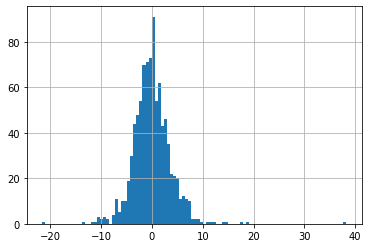

In [26]:
df.Daily_Change.hist(bins=100) # tworzy histogram za pomocą biblitoeki matplotlib. Biblioteka seaborn = biblioteka do wiz. statystycznych

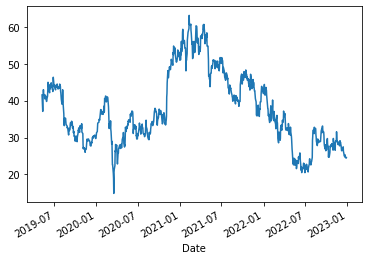

In [27]:
df.Close.plot() # plotuje podane dane

FILTROWANIE DANYCH

In [28]:
df

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,4.141439
...,...,...,...,...,...,...,...,...
2022-12-21,25.15,25.670,24.8709,25.36,20444478,25.255,24.96,1.602564
2022-12-22,24.93,25.100,24.0415,24.64,23752734,24.785,25.36,-2.839117
2022-12-23,24.46,24.725,24.1620,24.64,11610045,24.550,24.64,0.000000


In [29]:
#chcemy wyciąć sesje giełdowe gdzie były dodatnie stopy zwrotu Daily_change - wartość dodatnia
df.Daily_Change > 0

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2022-12-21     True
2022-12-22    False
2022-12-23    False
2022-12-27    False
2022-12-28     True
Name: Daily_Change, Length: 917, dtype: bool

In [32]:
df_positive = df[df.Daily_Change > 0] #wyciąga DataFrame o podanym warunku
df_positive

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,4.141439
2019-05-24,41.28,41.51,40.5000,41.51,8786751,41.395,40.47,2.569805
2019-05-31,41.15,41.57,39.4100,40.41,23209848,40.780,39.80,1.532663
...,...,...,...,...,...,...,...,...
2022-12-12,26.42,27.23,26.1100,27.03,16483626,26.725,26.55,1.807910
2022-12-14,27.07,27.82,26.7700,27.47,19427279,27.270,26.98,1.816160
2022-12-20,24.72,25.28,24.6100,24.96,28536476,24.840,24.95,0.040080


In [33]:
df_positive.Daily_Change.mean() # obliczenie średniej stopy zwrotu

2.8200894701255015

In [34]:
df_negative = df[df.Daily_Change < 0] #wyciąga DataFrame o podanym warunku
df_negative

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-10.752947
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-2.534884
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.763541
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.216398
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.602410
...,...,...,...,...,...,...,...,...
2022-12-15,26.98,27.11,25.8800,26.24,19383729,26.610,27.47,-4.477612
2022-12-16,26.06,26.45,25.6600,25.97,22684200,26.015,26.24,-1.028963
2022-12-19,26.02,26.02,24.6900,24.95,35616094,25.485,25.97,-3.927609


In [35]:
df_negative.Daily_Change.mean()

-2.5508259777214515

In [36]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2022-12-21    False
2022-12-22    False
2022-12-23    False
2022-12-27    False
2022-12-28    False
Length: 917, dtype: bool

In [37]:
df[df.Close == df.High] # sprawdzamy czy cena Close była równa najwyższej w ciągu dnia

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,7.708895
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,2.569805
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.483247
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,4.455446
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,1.278011
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,4.971182


In [38]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-7.615481
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.646088
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-1.630258
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-4.045155
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-1.711205


In [42]:
df[df.index > '2022-10-01']

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2022-10-03,26.760,26.900,25.9600,26.72,19940791,26.7400,26.50,0.830189
2022-10-04,27.625,29.250,27.5995,29.19,25462214,28.4075,26.72,9.244012
2022-10-05,28.480,29.650,28.3100,29.18,21458516,28.8300,29.19,-0.034258
2022-10-06,29.200,30.240,28.9600,29.73,25399517,29.4650,29.18,1.884853
2022-10-07,28.830,28.860,27.9200,28.07,19690232,28.4500,29.73,-5.583586
...,...,...,...,...,...,...,...,...
2022-12-21,25.150,25.670,24.8709,25.36,20444478,25.2550,24.96,1.602564
2022-12-22,24.930,25.100,24.0415,24.64,23752734,24.7850,25.36,-2.839117
2022-12-23,24.460,24.725,24.1620,24.64,11610045,24.5500,24.64,0.000000


In [43]:
df[(df.index >= '2022-11-01') & (df.index < '2022-11-15')] # w takim zapytaniu nie można zastosować and tylko trezba zastsować &

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2022-11-01,30.070,30.9999,29.120,29.75,87994014,29.9100,26.57,11.968385
2022-11-02,29.570,30.1600,28.630,28.81,37083453,29.1900,29.75,-3.159664
2022-11-03,28.030,29.5200,27.710,28.73,28033212,28.3800,28.81,-0.277681
2022-11-04,29.440,29.7250,28.040,28.39,22304190,28.9150,28.73,-1.183432
2022-11-07,28.705,28.8250,27.615,27.69,19204075,28.1975,28.39,-2.465657
2022-11-08,27.570,28.3300,26.820,27.44,27033898,27.5050,27.69,-0.902853
2022-11-09,27.310,28.0050,26.440,26.55,21186266,26.9300,27.44,-3.243440
2022-11-10,28.380,29.3200,28.100,28.85,35196917,28.6150,26.55,8.662900
2022-11-11,28.950,30.4350,28.700,29.15,35861055,29.0500,28.85,1.039861


In [45]:
df[(df.index == '2022-11-01') | (df.index == '2022-11-07')] # | or

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2022-11-01,30.070,30.9999,29.120,29.75,87994014,29.9100,26.57,11.968385
2022-11-07,28.705,28.8250,27.615,27.69,19204075,28.1975,28.39,-2.465657


In [46]:
df

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,4.141439
...,...,...,...,...,...,...,...,...
2022-12-21,25.15,25.670,24.8709,25.36,20444478,25.255,24.96,1.602564
2022-12-22,24.93,25.100,24.0415,24.64,23752734,24.785,25.36,-2.839117
2022-12-23,24.46,24.725,24.1620,24.64,11610045,24.550,24.64,0.000000


In [47]:
df.index.month # zwraca indeks który zawiera nr miesiąca

Int64Index([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=917)

In [48]:
df.index.month == 5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [49]:
df[df.index.month==5]

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-10.752947
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,7.708895
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,3.328328
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,4.141439
...,...,...,...,...,...,...,...,...
2022-05-24,23.69,23.740,21.410,21.55,40726064,22.620,23.78,-9.377628
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,21.55,2.273782
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,22.04,4.809437


In [50]:
df[df.index.year==2021] # zwróci dane z podanego roku

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2021-01-04,52.220,52.32,49.6350,51.14,17291804,51.6800,51.00,0.274510
2021-01-05,51.000,54.19,50.7600,54.01,21403169,52.5050,51.14,5.612045
2021-01-06,53.310,54.07,52.0000,52.48,17738115,52.8950,54.01,-2.832809
2021-01-07,53.370,56.25,53.2000,56.13,23737543,54.7500,52.48,6.955030
2021-01-08,54.395,54.79,52.5800,53.28,37999442,53.8375,56.13,-5.077499
...,...,...,...,...,...,...,...,...
2021-12-27,43.440,44.24,42.8201,42.96,28284981,43.2000,43.91,-2.163516
2021-12-28,42.600,43.74,42.3000,42.54,21480952,42.5700,42.96,-0.977654
2021-12-29,42.720,42.93,41.8150,42.46,15908613,42.5900,42.54,-0.188058


In [51]:
df[df.index.day == 1] # zwróci wszystkie dane z 1 dnia miesiąca

,Open,High,Low,Close,Volume,Avarage,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-4.549375
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-1.969625
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-4.332130
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.412698
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-8.954155
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-6.210770
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-1.376652
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-2.091377
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,1.992269
